In [1]:
%matplotlib inline
import lsst.daf.persistence as dafPersist
import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom
import lsst.afw.coord as afwCoord
import lsst.afw.image as afwImage
import numpy as np
import matplotlib
import matplotlib.pylab as plt

visit = 11692
ccd = 35
filter = 'HSC-G'
tract = 0

fluxT = 'ext_photometryKron_KronFlux'
#fluxT = 'base_CircularApertureFlux_6_0'

dataid = {'visit':visit, 'filter':filter, 'ccd':ccd, 'tract':tract}

butler = dafPersist.Butler("/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun")
mdRef = butler.get("calexp_md", dataid, immediate=True)
calibOld = afwImage.Calib(mdRef)

photoCalib = butler.get('photoCalib', dataid, immediate=True)
calibNew = afwImage.Calib(photoCalib.getInstFluxMag0())

src = butler.get('src', dataid, immediate=True).asAstropy()

In [2]:
butler.get('photoCalib_filename', dataid)

['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-035.fits']

In [3]:
cut = (src[fluxT + '_flag'] == 0) & (src[fluxT + '_flux'] > 0.)
cut &= (src[fluxT + '_flux']/src[fluxT + '_fluxSigma'] > 10.)

magOld = calibOld.getMagnitude(src[cut][fluxT + '_flux'])
magNew = calibNew.getMagnitude(src[cut][fluxT + '_flux'])

magOld-magNew

/sps/lsst/software/lsst_distrib/w_2017_49/python/miniconda3-4.3.21/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


array([-0.1536792, -0.1536792, -0.1536792, ..., -0.1536792, -0.1536792,
       -0.1536792])

In [4]:
from astropy.table import Table, vstack

tract = 0
visits = [11692, 1204, 1230]
filters = ['HSC-G', 'HSC-R', 'HSC-I']

#fluxT = 'base_CircularApertureFlux_6_0'
fluxT = 'ext_photometryKron_KronFlux'

butler = dafPersist.Butler("/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun")

catalog = {}

for v, f in zip(visits, filters):
    for ccd in range(104):
        if ccd == 9:
            continue
            
        dataid = {'visit':v, 'filter':f, 'ccd':ccd, 'tract':tract}
        
        mdRef = butler.get("calexp_md", dataid, immediate=True)
        calibOld = afwImage.Calib(mdRef)
        photoCalib = butler.get('photoCalib', dataid, immediate=True)
        print(butler.get('photoCalib_filename', dataid))
        calibNew = afwImage.Calib(photoCalib.getInstFluxMag0())
        
        src = butler.get('src', dataid, immediate=True).asAstropy()
        
        cut = (src[fluxT + '_flag'] == 0) & (src[fluxT + '_flux'] > 0.)
        cut &= (src[fluxT + '_flux']/src[fluxT + '_fluxSigma'] > 10.)
        cut &= (src['base_ClassificationExtendedness_value'] < 0.5)
        cut &= (src['parent'] == 0) & (src['deblend_nChild'] == 0)
        
        clean = src[cut]

        magOld = calibOld.getMagnitude(clean[fluxT + '_flux'])
        magNew = calibNew.getMagnitude(clean[fluxT + '_flux'])
        
        clean['magOld'] = magOld
        clean['magNew'] = magNew
        clean['ccd'] = ccd
        
        if ccd == 0:
            catalog[f] = clean
        else:
            catalog[f] = vstack([catalog[f], clean])

['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-000.fits']


/sps/lsst/software/lsst_distrib/w_2017_49/python/miniconda3-4.3.21/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-001.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-002.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-003.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-004.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-005.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-006.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-007.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-008.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-010.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-011.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-012.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-013.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-014.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-015.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-016.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-017.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-018.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-019.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-020.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-021.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-022.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-023.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-024.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-025.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-026.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-027.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-028.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-029.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-030.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-031.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-032.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-033.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-034.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-035.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-036.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-037.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-038.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-039.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-040.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-041.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-042.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-043.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-044.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-045.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-046.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-047.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-048.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-049.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-050.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-051.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-052.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-053.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-054.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-055.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-056.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-057.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-058.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-059.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-060.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-061.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-062.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-063.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-064.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-065.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-066.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-067.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-068.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-069.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-070.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-071.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-072.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-073.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-074.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-075.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-076.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-077.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-078.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-079.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-080.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-081.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-082.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-083.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-084.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-085.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-086.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-087.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-088.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-089.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-090.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-091.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-092.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-093.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-094.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-095.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-096.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-097.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-098.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-099.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-100.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-101.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-102.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0011692-103.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-000.fits']
['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-001.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-002.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-003.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-004.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-005.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-006.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-007.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-008.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-010.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-011.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-012.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-013.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-014.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-015.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-016.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-017.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-018.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-019.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-020.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-021.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-022.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-023.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-024.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-025.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-026.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-027.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-028.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-029.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-030.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-031.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-032.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-033.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-034.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-035.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-036.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-037.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-038.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-039.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-040.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-041.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-042.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-043.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-044.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-045.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-046.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-047.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-048.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-049.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-050.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-051.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-052.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-053.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-054.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-055.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-056.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-057.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-058.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-059.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-060.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-061.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-062.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-063.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-064.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-065.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-066.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-067.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-068.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-069.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-070.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-071.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-072.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-073.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-074.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-075.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-076.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-077.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-078.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-079.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-080.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-081.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-082.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-083.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-084.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-085.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-086.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-087.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-088.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-089.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-090.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-091.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-092.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-093.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-094.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-095.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-096.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-097.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-098.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-099.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-100.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-101.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-102.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001204-103.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-000.fits']
['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-001.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-002.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-003.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-004.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-005.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-006.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-007.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-008.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-010.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-011.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-012.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-013.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-014.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-015.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-016.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-017.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-018.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-019.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-020.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-021.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-022.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-023.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-024.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-025.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-026.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-027.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-028.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-029.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-030.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-031.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-032.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-033.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-034.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-035.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-036.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-037.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-038.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-039.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-040.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-041.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-042.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-043.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-044.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-045.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-046.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-047.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-048.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-049.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-050.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-051.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-052.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-053.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-054.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-055.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-056.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-057.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-058.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-059.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-060.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-061.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-062.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-063.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-064.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-065.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-066.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-067.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-068.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-069.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-070.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-071.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-072.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-073.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-074.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-075.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-076.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-077.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-078.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-079.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-080.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-081.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-082.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-083.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-084.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-085.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-086.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-087.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-088.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-089.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-090.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-091.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-092.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-093.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-094.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-095.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-096.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-097.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-098.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-099.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-100.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-101.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-102.fits']


['/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/output/rerun/rerun/jointcal-results/0000/photoCalib-0001230-103.fits']


In [5]:
from astropy.coordinates import SkyCoord
from astropy import units as u

cG = SkyCoord(ra = catalog['HSC-G']['coord_ra'], dec = catalog['HSC-G']['coord_dec'])
cR = SkyCoord(ra = catalog['HSC-R']['coord_ra'], dec = catalog['HSC-R']['coord_dec'])
cI = SkyCoord(ra = catalog['HSC-I']['coord_ra'], dec = catalog['HSC-I']['coord_dec'])

idxR, d2dR, d3dR = cG.match_to_catalog_sky(cR)
idxI, d2dI, d3dI = cG.match_to_catalog_sky(cI)
print(len(cG), len(cR), len(cI), len(idxR), len(idxI))

#cut2 = d2d < 1.0*u.arcsec 
#print(d2d[1000])
#print(cG[1000], cR[idx[1000]])
#print(cR[1000], cG[idx[1000]])

7995 11195 9061 7995 7995


In [6]:
catalog['HSC-G']['magROld'] = catalog['HSC-R'][idxR]['magOld']
catalog['HSC-G']['magRNew'] = catalog['HSC-R'][idxR]['magNew']
catalog['HSC-G']['distR'] = d2dR.arcsec 
catalog['HSC-G']['magIOld'] = catalog['HSC-I'][idxI]['magOld']
catalog['HSC-G']['magINew'] = catalog['HSC-I'][idxI]['magNew']
catalog['HSC-G']['distI'] = d2dI.arcsec                            

In [7]:
cut2 = (catalog['HSC-G']['distR'] < 0.10) & (catalog['HSC-G']['distI'] < 0.10) & (catalog['HSC-G']['magOld'] < 23)
cut2 &= (catalog['HSC-G']['base_ClassificationExtendedness_value'] < 0.5)
newCat = catalog['HSC-G'][cut2]
newCatR = catalog['HSC-R'][idxR][cut2]
newCatI = catalog['HSC-I'][idxI][cut2]

print(len(catalog['HSC-G']), len(newCat))

7995 1727


In [33]:
catalog['HSC-G']

id,coord_ra,coord_dec,parent,calib_detected,calib_psfCandidate,calib_psfUsed,calib_psfReserved,deblend_nChild,deblend_deblendedAsPsf,deblend_psfCenter_x,deblend_psfCenter_y,deblend_psfFlux,deblend_tooManyPeaks,deblend_parentTooBig,deblend_masked,deblend_skipped,deblend_rampedTemplate,deblend_patchedTemplate,deblend_hasStrayFlux,base_GaussianCentroid_x,base_GaussianCentroid_y,base_GaussianCentroid_flag,base_GaussianCentroid_flag_noPeak,base_GaussianCentroid_flag_resetToPeak,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xSigma,slot_Centroid_xSigma,base_SdssCentroid_ySigma,slot_Centroid_ySigma,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianCentroid_flag_badInitialCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PsfFlux_flag_badCentroid,base_SdssShape_flag_badCentroid,base_Variance_flag_badCentroid,ext_photometryKron_KronFlux_flag_badInitialCentroid,ext_shapeHSM_HsmPsfMoments_flag_badCentroid,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianCentroid_flag_badInitialCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_NaiveCentroid_flag_badInitialCentroid_edge,base_PsfFlux_flag_badCentroid_edge,base_SdssShape_flag_badCentroid_edge,base_Variance_flag_badCentroid_edge,ext_photometryKron_KronFlux_flag_badInitialCentroid_edge,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_edge,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,base_SdssShape_flag_badCentroid_noSecondDerivative,base_Variance_flag_badCentroid_noSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_noSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,base_SdssShape_flag_badCentroid_almostNoSecondDerivative,base_Variance_flag_badCentroid_almostNoSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianCentroid_flag_badInitialCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_NaiveCentroid_flag_badInitialCentroid_notAtMaximum,base_PsfFlux_flag_badCentroid_notAtMaximum,base_SdssShape_flag_badCentroid_notAtMaximum,base_Variance_flag_badCentroid_notAtMaximum,ext_photometryKron_KronFlux_flag_badInitialCentroid_notAtMaximum,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmSourceMom

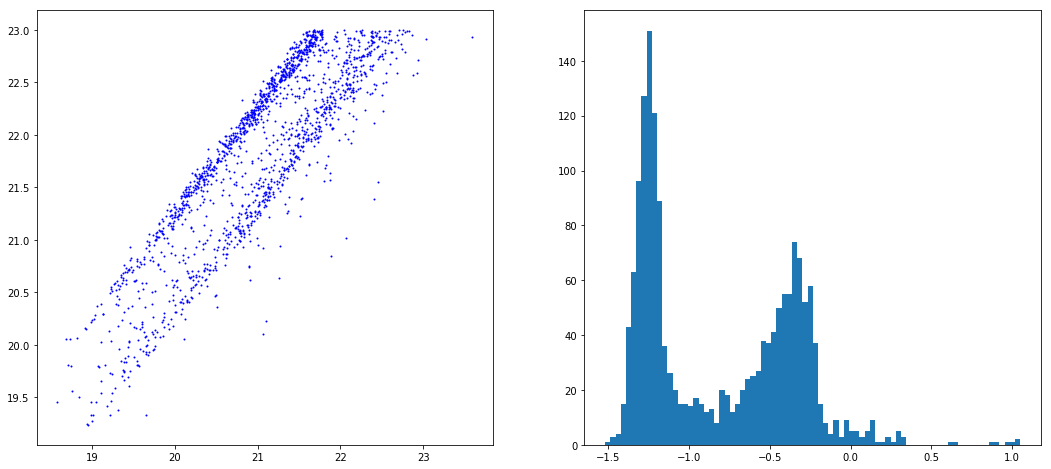

In [28]:
%matplotlib inline
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 8))
_ = ax0.scatter(newCat['magROld'], newCat['magOld'], s=1, color='b')
_ = ax1.hist(newCat['magROld']-newCat['magOld'], bins=80)

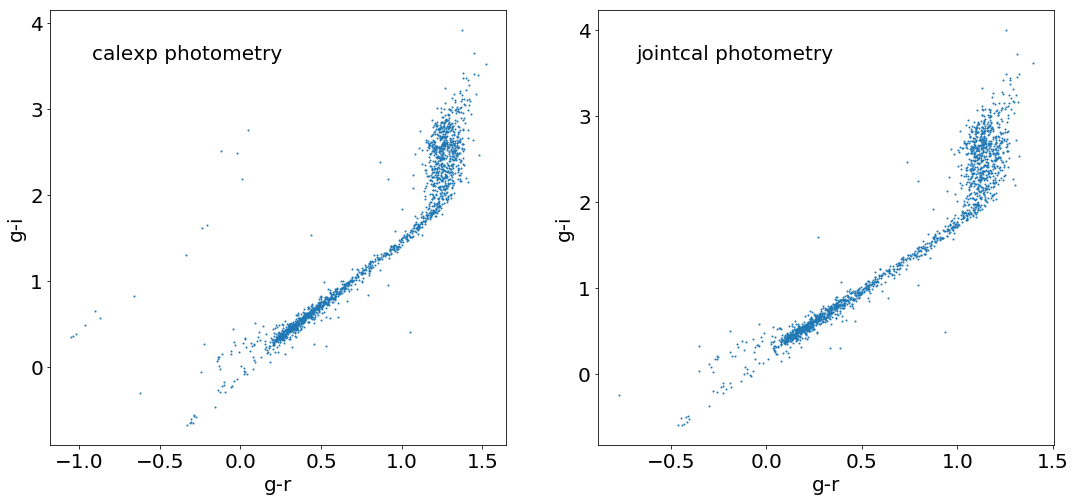

In [29]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 8))
_ = ax0.scatter(newCat['magOld'] - newCat['magROld'], newCat['magOld'] - newCat['magIOld'], s=1)
ax0.set_xlabel('g-r', fontsize=20)
ax0.set_ylabel('g-i', fontsize=20)
ax0.text(0.3,0.9,'calexp photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax0.transAxes, fontsize=20)
_ = ax1.scatter(newCat['magNew'] - newCat['magRNew'], newCat['magNew'] - newCat['magINew'], s=1)
ax1.set_xlabel('g-r', fontsize=20)
ax1.set_ylabel('g-i', fontsize=20)
ax1.text(0.3,0.9,'jointcal photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax1.transAxes, fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)

fig.savefig('jointcal_color_simple.png')

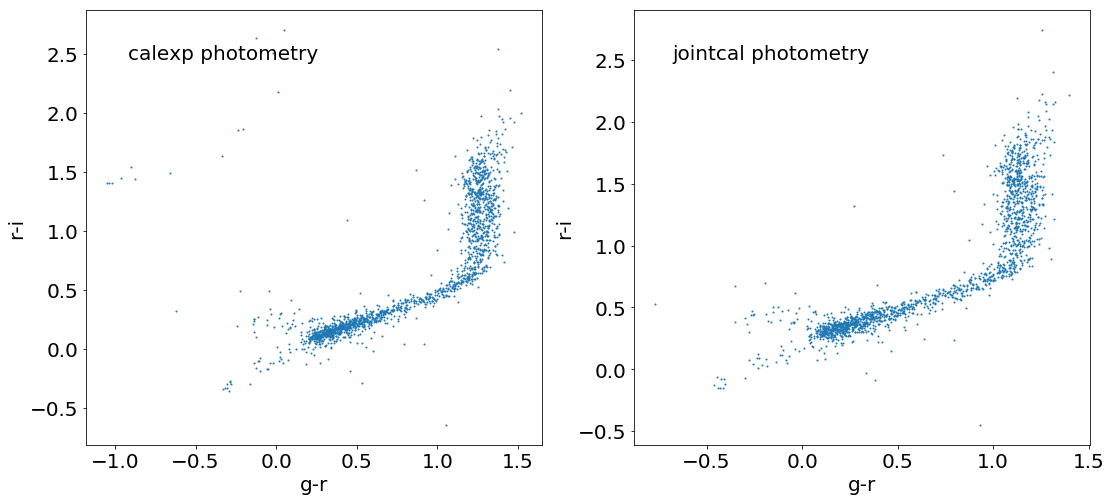

In [31]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 8))
_ = ax0.scatter(newCat['magOld'] - newCat['magROld'], newCat['magROld'] - newCat['magIOld'], s=1)
ax0.set_xlabel('g-r', fontsize=20)
ax0.set_ylabel('r-i', fontsize=20)
ax0.text(0.3,0.9,'calexp photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax0.transAxes, fontsize=20)
_ = ax1.scatter(newCat['magNew'] - newCat['magRNew'], newCat['magRNew'] - newCat['magINew'], s=1)
ax1.set_xlabel('g-r', fontsize=20)
ax1.set_ylabel('r-i', fontsize=20)
ax1.text(0.3,0.9,'jointcal photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax1.transAxes, fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)

fig.savefig('jointcal_color_constrained.png')

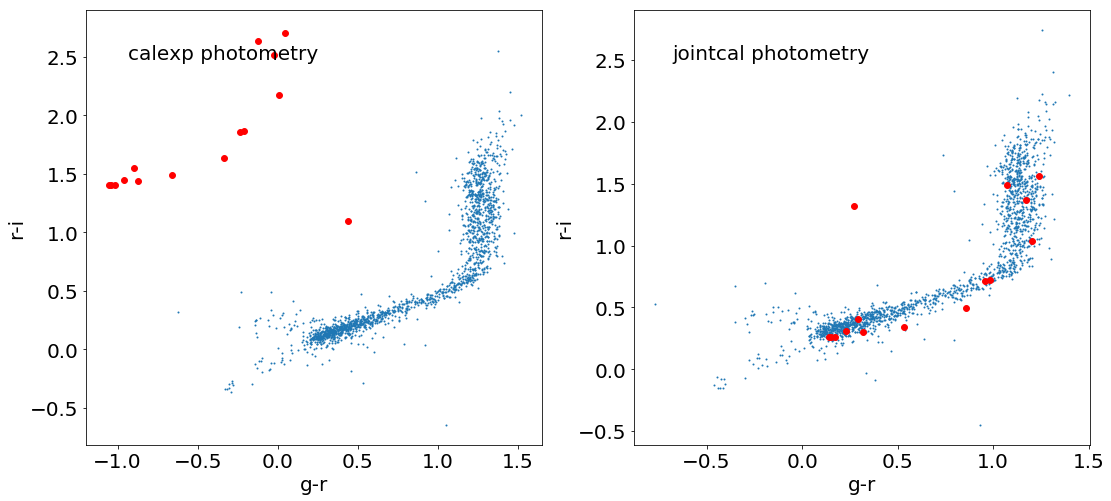

In [8]:
cc = (newCat['magOld'] - newCat['magROld'] < 0.5) & (newCat['magROld'] - newCat['magIOld'] > 1.0)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 8))
_ = ax0.scatter(newCat['magOld'] - newCat['magROld'], newCat['magROld'] - newCat['magIOld'], s=1)
_ = ax0.scatter(newCat[cc]['magOld'] - newCat[cc]['magROld'], newCat[cc]['magROld'] - newCat[cc]['magIOld'], s=35, c='r')
ax0.set_xlabel('g-r', fontsize=20)
ax0.set_ylabel('r-i', fontsize=20)
ax0.text(0.3,0.9,'calexp photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax0.transAxes, fontsize=20)
_ = ax1.scatter(newCat['magNew'] - newCat['magRNew'], newCat['magRNew'] - newCat['magINew'], s=1)
_ = ax1.scatter(newCat[cc]['magNew'] - newCat[cc]['magRNew'], newCat[cc]['magRNew'] - newCat[cc]['magINew'], s=35, c='r')
ax1.set_xlabel('g-r', fontsize=20)
ax1.set_ylabel('r-i', fontsize=20)
ax1.text(0.3,0.9,'jointcal photometry',horizontalalignment='center',
     verticalalignment='center', transform = ax1.transAxes, fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)

fig.savefig('jointcal_color_constrained.png')

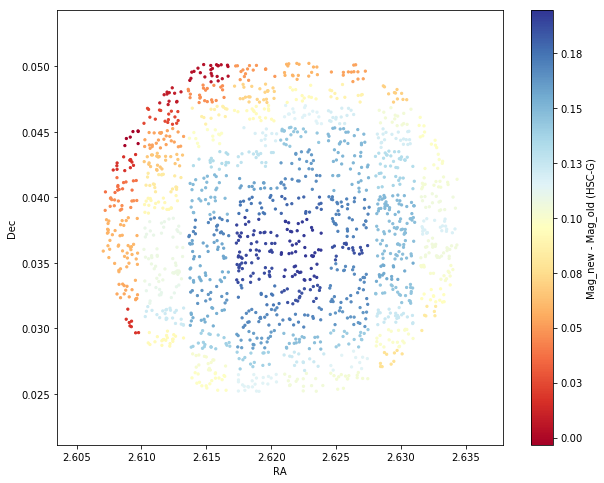

In [10]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(10, 8))
sc = ax0.scatter(newCat['coord_ra'], newCat['coord_dec'], c = newCat['magNew'] - newCat['magOld'], s=5, cmap=plt.cm.RdYlBu)
cb = fig.colorbar(sc, format='%.2f')
cb.set_label('Mag_new - Mag_old (HSC-G)')
ax0.set_xlabel('RA')
ax0.set_ylabel('Dec')
fig.savefig('jointcal_color_ra_dec_g_cons.png')

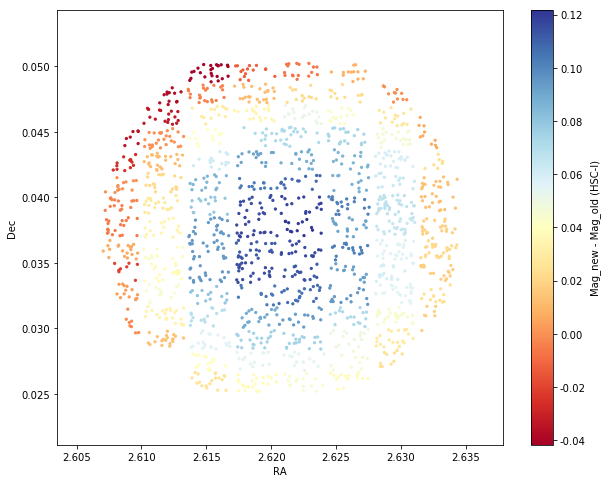

In [11]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sc = ax1.scatter(newCat['coord_ra'], newCat['coord_dec'], c = newCat['magINew'] - newCat['magIOld'], s=5, cmap=plt.cm.RdYlBu)
cb = fig.colorbar(sc, format='%.2f')
cb.set_label('Mag_new - Mag_old (HSC-I)')
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')
fig.savefig('jointcal_color_ra_dec_i_cons.png')

In [12]:
newCatR[cc]

id,coord_ra,coord_dec,parent,calib_detected,calib_psfCandidate,calib_psfUsed,calib_psfReserved,deblend_nChild,deblend_deblendedAsPsf,deblend_psfCenter_x,deblend_psfCenter_y,deblend_psfFlux,deblend_tooManyPeaks,deblend_parentTooBig,deblend_masked,deblend_skipped,deblend_rampedTemplate,deblend_patchedTemplate,deblend_hasStrayFlux,base_GaussianCentroid_x,base_GaussianCentroid_y,base_GaussianCentroid_flag,base_GaussianCentroid_flag_noPeak,base_GaussianCentroid_flag_resetToPeak,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xSigma,slot_Centroid_xSigma,base_SdssCentroid_ySigma,slot_Centroid_ySigma,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianCentroid_flag_badInitialCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PsfFlux_flag_badCentroid,base_SdssShape_flag_badCentroid,base_Variance_flag_badCentroid,ext_photometryKron_KronFlux_flag_badInitialCentroid,ext_shapeHSM_HsmPsfMoments_flag_badCentroid,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianCentroid_flag_badInitialCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_NaiveCentroid_flag_badInitialCentroid_edge,base_PsfFlux_flag_badCentroid_edge,base_SdssShape_flag_badCentroid_edge,base_Variance_flag_badCentroid_edge,ext_photometryKron_KronFlux_flag_badInitialCentroid_edge,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_edge,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,base_SdssShape_flag_badCentroid_noSecondDerivative,base_Variance_flag_badCentroid_noSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_noSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,base_SdssShape_flag_badCentroid_almostNoSecondDerivative,base_Variance_flag_badCentroid_almostNoSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianCentroid_flag_badInitialCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_NaiveCentroid_flag_badInitialCentroid_notAtMaximum,base_PsfFlux_flag_badCentroid_notAtMaximum,base_SdssShape_flag_badCentroid_notAtMaximum,base_Variance_flag_badCentroid_notAtMaximum,ext_photometryKron_KronFlux_flag_badInitialCentroid_notAtMaximum,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmSourceMom

In [13]:
newCatI[cc]

id,coord_ra,coord_dec,parent,calib_detected,calib_psfCandidate,calib_psfUsed,calib_psfReserved,deblend_nChild,deblend_deblendedAsPsf,deblend_psfCenter_x,deblend_psfCenter_y,deblend_psfFlux,deblend_tooManyPeaks,deblend_parentTooBig,deblend_masked,deblend_skipped,deblend_rampedTemplate,deblend_patchedTemplate,deblend_hasStrayFlux,base_GaussianCentroid_x,base_GaussianCentroid_y,base_GaussianCentroid_flag,base_GaussianCentroid_flag_noPeak,base_GaussianCentroid_flag_resetToPeak,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xSigma,slot_Centroid_xSigma,base_SdssCentroid_ySigma,slot_Centroid_ySigma,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianCentroid_flag_badInitialCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PsfFlux_flag_badCentroid,base_SdssShape_flag_badCentroid,base_Variance_flag_badCentroid,ext_photometryKron_KronFlux_flag_badInitialCentroid,ext_shapeHSM_HsmPsfMoments_flag_badCentroid,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianCentroid_flag_badInitialCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_NaiveCentroid_flag_badInitialCentroid_edge,base_PsfFlux_flag_badCentroid_edge,base_SdssShape_flag_badCentroid_edge,base_Variance_flag_badCentroid_edge,ext_photometryKron_KronFlux_flag_badInitialCentroid_edge,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_edge,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,base_SdssShape_flag_badCentroid_noSecondDerivative,base_Variance_flag_badCentroid_noSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_noSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,base_SdssShape_flag_badCentroid_almostNoSecondDerivative,base_Variance_flag_badCentroid_almostNoSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianCentroid_flag_badInitialCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_NaiveCentroid_flag_badInitialCentroid_notAtMaximum,base_PsfFlux_flag_badCentroid_notAtMaximum,base_SdssShape_flag_badCentroid_notAtMaximum,base_Variance_flag_badCentroid_notAtMaximum,ext_photometryKron_KronFlux_flag_badInitialCentroid_notAtMaximum,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmSourceMom

In [11]:
import h5py
newCat.write('data_jointcal/gri.hdf5')

ModuleNotFoundError: No module named 'h5py'